In [9]:
%matplotlib inline

# Introduction to Simulation: Complex social dynamics in a few lines of code

We will create a model depicting competition between two cultural traits within a common population. This is a typical cultural dynamics scenario where individuals must adopt one option amongst two or more **mutually exclusive** options (i.e. religion, elections, football teams, ...). In this case we are interested in situations when you have to choose one option (e.g., you cannot practice two religions), but more complex versions with individuals adopting more than one trait can easily be developed.

Individuals can change their choice over time. The decision is based on the payoff of each trait. This payoff is a measure of the relative interest of the trait, based on: 

a) how many people exhibits the trait and 

b) the attractiveness of the trait.

An example of this dynamic could be a competition between two different religions. The number of people practicing a belief makes this belief more appealing. However, some beliefs could be intrinsically more interesting for some individuals so part of the population could adopt them even if they are a minority. Finally, social norms are not static so the attractiveness of specific beliefs can vary over time.


![general overview of the model](diagram.png)

Time is divided in discrete steps starting at t = 0. 

At each step t the two populations $A_t$ and $B_t$ are updated as individuals move from A to B and from B to A (the value here can be negative meaning that more people leave than arrive).

\begin{equation*}
A_{t+1} = A_t + \Delta AB
\end{equation*}

\begin{equation*}
B_{t+1} = B_t + \Delta AB
\end{equation*}   

Let's see how we can express it in code. 

<!--XRC: no needed because they all use python 3.2
We start with an auxiliary line of code which prevents truncation when dividing integers. You don't have to worry about it now but just keep in mind to start any code written in Python 2.7 or earlier with this line. If you have installed Python 3.2 or higher you can skip this line.
from __future__ import division
-->

First, we need to define the number of individuals in the population. Say we want to start with 100 people. The text after a hash symbol is just a comment so you can skip it for now, but in general it is a good idea to keep documenting the code as you write.

In [1]:
N = 100   # total population size

Then, we decide on how many believers of each cultural option (religion) we want to start with. 

In [2]:
A = 65    # initial number of believers A
B = N - A

NameError: name 'N' is not defined

Finally, we want to update these quantities at every time step:

In [3]:
t = 0
MAX_TIME = 100
while t < MAX_TIME:
    A = A + change
    B = B + change
    t += 1

NameError: name 'change' is not defined

Type the code in the code tab. Keep in mind that indents are important. 

Run the code by hitting F5 (or click on a green triangle). What happens? 

Well, nothing happens or, rather, we get an error. 
```python
NameError: name change is not defined 
```
Indeed, we have not defined what do we mean by 'change'. So let's calculate the change from the pool of believers A to the pool of believers B. 
As we mentioned the transmission of believers from one trait to the other is determined by the number of adopters of the trait as well as its internal attractiveness. 

The transmission mechanism in this model is based on the payoff that each cultural trait gives to its population. If the other trait is perceived as the best option then some people will switch their previous option. To define the transmission we need to implement the following competition equations:

\begin{equation*}
\Delta_{B\to A} = \frac{A_t}{N}\ \frac {T_A} {(T_A + T_B)}\
\end{equation*} 


\begin{equation*}
\Delta_{A\to B} = \frac{B_t}{N}\ \frac {T_B} {(T_A + T_B)}\
\end{equation*} 

Let's look at the equations a bit more closely. The first term is the proportion of the entire population N holding a particular cultural trait ($\frac {A_t}{N}$ for $A$ and $\frac {B_t}{N}$ for $B$). While the second element of the equations is the balance between the attractiveness of both ideas ($T_A$ and $T_B$) expressed as the attractiveness of the given trait in respect to the total 'available' attractiveness ($T_A + T_B$). 

You have probably immediately noticed that these two equations are the same in structure and only differ in terms of what is put into them. Therefore, to avoid unnecessary hassle we will create a 'universal' function that can be used for both. Type the code below at the beginning of your script:

In [3]:
def transmission(no_believers, Tx,Ty):

    no_adopters = (no_believers / N) 
    attraction = Tx / (Tx + Ty)
    return no_adopters * attraction

Let's break it down a little. First we define the function and give it the input - the number of believers and the two values that define how attractive each cultural option is. 

def transmission(no_believers, Tx, Ty):

Then we calculate two values:

1. percentage of population sharing this cultural option
```python
    no_adopters = (no_believers / N)
```    
2. how attractive the option is
```python
    attraction = Tx / (Tx + Ty)
```    

Look at the equations above, the first element is just the $\frac {A_t}{N}$ and $\frac {B_t}{N}$ part and the second is this bit: $\frac {T_A} {(T_A + T_B)}$. 
Finally we return the results of the calculations. 
```python
    return no_adopters * attraction
```

Voila! We have implemented the equation into Python code. Now, let's call the function from the main loop - we need to do it twice to get the change from A to B and from B to A and each time we can pass different values into it. So to get the payoff for changing from B to A we use 
```python
changeBA = transmission(A, Ta, Tb)
```
and to get the change from A to B: 
```python
changeAB = transmission(B, Tb, Ta)
```
That is, we pass the number of believers and the attractiveness of the traits. The order in which we pass the input variables into a function is important. In the B to A transmission, B becomes 'no_believers', while Ta becomes 'Tx' and Tb becomes 'Ty'. In the second line showing the A to B transmission, A becomes 'no_believers', Tb becomes 'Tx' and Ta becomes 'Ty'.

We can use an additional term to have a control over how strong the transmission from A to B and back is - we will call it alpha (α). Add the alpha term to the two lines of code. It should now look like this:

In [5]:
    # calculate the change between believers A and B in the current time step       
    changeBA = alpha * transmission(A, Ta, Tb)      
    changeAB = alpha * transmission(B, Tb, Ta) 

NameError: name 'alpha' is not defined

The obvious problem now is that we have not defined the alpha or the 'attractiveness' of each trait. To do so add their definitions at the beginning of the script around other definitions (N, A, B, MAX_TIME, etc). 

In [6]:
Ta = 1.0            # initial attractiveness of option A
Tb = 2            # initial attractiveness of option B
alpha = 0.1         # strength of the transmission process

We can now calculate the difference between the perceived payoffs during this time step. To do so, we need to first see which one did better (A or B).  

In [7]:
    finalDiff = changeBA - changeAB

NameError: name 'changeBA' is not defined

Now, if the difference between the two is negative then we know that more people left A than B, if it is positive than more people left B than A. What is left is to see how many people moved. We can express it in the main while loop, like this:

In [8]:
    # B -> A
    if finalDiff > 0:
        change = finalDiff*B
    # A -> B        
    else:
        change = finalDiff*A
    # update the population    
    A = A + change
    B = B - change    

NameError: name 'finalDiff' is not defined

Note that we had to change the sign in 
```python
B = B + change
```
this is because, if more people moved from A to B then the 'change' will be negative, hence we need to substract them (two - is a +) and vice versa. 

You should bear in mind that the main loop code should be located after the definition of the transmission function and the initialization of variables (because they are used here). It should look like this:

In [9]:
while t < MAX_TIME:
    # calculate the change between believers A and B in the current time step       
    changeBA = alpha * transmission(A, Ta, Tb)      
    changeAB = alpha * transmission(B, Tb, Ta) 
    finalDiff = changeBA - changeAB
             
    # B -> A   
    if finalDiff > 0:
        change = finalDiff*B
    # A -> B        
    else:
        change = finalDiff*A
    # update the population    
    A = A + change
    B = B - change    
    t += 1

NameError: name 'N' is not defined

OK, we have all the elements ready now and if you run the code the computer will churn all the numbers somewhere in the background. However, it produces no output so we have no idea what is actually happening. Let's solve this by visualising the flow of believers from one option to another. 
First, we will create two empty lists. Then, at each timestep, we will add the current number of believers to these lists and finally, at the end of the simulation run we will plot them to see how they changed over time. 
Start with creating two empty lists. Add the following code right after all the variable definitions at the beginning of the code before the while loop: 

In [10]:
believersA = []    
believersB = []

The whole initialisation/definition block at the beginning of your code should look like this: 

In [5]:
# initialisation 
MAX_TIME = 100
t = 0               # initial time
N = 100.0           # population size
A = 65              # initial proportion of believers A
B = N-A             # initial proportion of believers B

Ta = 1.0            # initial attractiveness of option A
Tb = 2.0            # initial attractiveness of option B
alpha = 0.1         # strength of the transmission process

believersA = []    # initialise the list used for plotting
believersB = []

believersA.append(A) # add the initial population
believersB.append(B)

We just added the initial number of believers to their respective lists. However, we also need to do this at the end of each time step. Add the following code at the end of the while loop - remember to align the indents with the previous line! 

In [12]:
    believersA.append(A)
    believersB.append(B)

The whole while-loop block should now look like this: 

In [6]:
while t < MAX_TIME: 
    
    # calculate the change between believers A and B in the current time step       
    changeBA = alpha * transmission(A, Ta, Tb)       
    changeAB = alpha * transmission(B, Tb, Ta)
    
    finalDiff = changeBA - changeAB
    
    # B -> A
    if finalDiff > 0:
        change = finalDiff*B
    # A -> B        
    else:
        change = finalDiff*A
    
    # update the population    
    A = A + change 
    B = B - change

    # save the values to a list for plotting    
    believersA.append(A)
    believersB.append(B)
        
    # time = time + 1        
    t+=1 

Finally, let's plot the results. First, we will import Python's plotting library, Matplotlib and use a predifined plotting style. Add these two lines at the beginning of your script:

In [7]:
import matplotlib.pyplot as plt      # plotting library
plt.style.use('ggplot')              # makes the graphs look pretty

Finally, let's plot! Plotting in Python is as easy as saying 'please plot this data for me'. Type these two lines at the very end of your code. We only want to plot the results once the simulation has finished so make sure this are not inside the while loop - that is, ensure this block of code is not indented. Run the code!

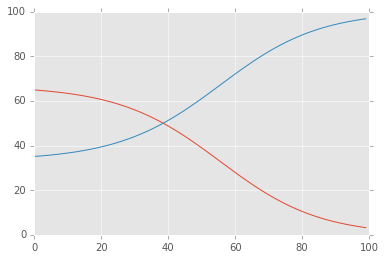

In [10]:
# plot the results    
plt.plot(believersA)
plt.plot(believersB) 

You can see how over time one set of believers increases while the other decreases. This is not particularly surprising as the attractiveness Tb is higher than Ta. However, can you imagine a configuration where this is not enough to sway the population? Have a go at setting the variables to different initial values to see what combination can counteract this pattern. 
1. set the initial value of A to 5, 10, 25, 50, 75
2. set the MAX_TIME to 1000,
3. set the Ta and Tb to 1.0, 1.1, 0.9, 0.01, etc.,
4. set alpha to 0.01, 0.1, 1.0 and 10.00. 

You can try all sorts of configurations to see how quickly the population shifts from one option to another or what are the minimum values of each variable that prevent it. 

However, we can make the model more interesting if we allow the attractiveness of each option to change through time. To do so let's define a new function. Add the following line at the beginning of the while loop (remember indentation!). 

In [16]:
    Ta, Tb = attractiveness(Ta, Tb) 

NameError: name 'attractiveness' is not defined

And let's define the 'attractiveness' function. We have already done it once for the the 'transmission' function so it should be a piece of cake. At each time step we will slightly modify the attractiveness of each trait using a stochastic kernel K. This can be expressed as: 

\begin{equation*}
T_{A, t+1} = {T_A} + {K_a}
\end{equation*} 

\begin{equation*}
T_{B, t+1} = {T_B} + {K_b}
\end{equation*} 

K can have several shapes such as:
* Fixed traits with $K_a = K_b = 0$
* Gaussian process with $K = N (0, 1)$
* A combination (e.g., $K_a = N (0, 1)$ and $K_b = t/3)$

Let's start with a fixed case scenario, i.e., $K_a$ and $K_b$ are both equal to zero. 

In [17]:
def attractiveness(Ta, Tb):

    Ka = 0  
    Kb = 0
    
    Ta = Ta + Ka
    Tb = Tb + Kb
    return Ta, Tb

First, we define the function and give it the input values. 
```python
def attractiveness(Ta, Tb):
```

Then, we establish how much the attractiveness of each trait changes (i.e., calculate $K_a$ and $K_b$)
```python 
Ka = 0         
Kb = 0
```

And plug them into the equations:

```python 
Ta = Ta + Ka
Tb = Tb + Kb
```

Finally, we return the new values:
```python 
return Ta, Tb
```
Have a go at changing the values of $K_a$ and $K_b$ and see what happens. 

There are a number of functions we can use to dynamically change the 'attractiveness' of each trait. Try the following ones:


In [18]:
import numpy as np # stick this line at the beginning of the script alongside other 'imports'


def attractiveness1(Ta, Tb):
    # sample 2 new values from a normal distribution with mean=0 and sd=1
    Ka, Kb = np.random.normal(0, 1, 2)    
    
    # get the minimum value from the 2 samples
    minValue = min(Ka,Kb)
    # compute new T's as the difference between the 2 values
    # one of them will be 0 while the other one (the larger value) will be positive
    Ta = Ka - minValue
    Tb = Kb - minValue

    return Ta, Tb

def attractiveness2(Ta, Tb):
    # both values initialized at 0
    Ka = 0
    Kb = 0
    # parameter defining the relevance of pop size in attractiveness
    relevancePop = 0.1
    
    # first we sample gamma with mean=last popSize of A times relevance    
    diffPop = np.random.gamma(relevancePop*believersA[t])
    # we sustract from this value the same computation for population B
    diffPop = diffPop - np.random.gamma(relevancePop*believersB[t])
    
    # if B is larger then we need to increase the attractiveness of A
    if diffPop < 0:
        Ka = -diffPop
    # else A is larger and we need to increase the attractiveness of B
    else:
        Kb = diffPop
    
    # add 1 to avoid dividing by 0 if both are 0        
    Ta = 1 + Ka
    Tb = 1 + Kb
    
    return Ta, Tb

Use the functions above (just change 'attractiveness' to, e.g., 'attractiveness2' in the main code) to see what happens when we add small dynamic variations to the process. What happens when the initial conditions are changed? What if we look at a much longer time scale? 